## Ejercicio 1

Experimenta con distintos modelos que reduzcan a dos dimensiones. Visualiza y compara como lo hicimos en la tarea 3, con las reducciones con PCA y T-SNE, tomando como referencia las clases reales (los números que representan cada fila). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2024-10-15 18:59:36.911341: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 18:59:36.914304: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 18:59:36.927277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 18:59:36.941244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 18:59:36.945386: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 18:59:36.956803: I tensorflow/core/platform/cpu_feature_gu

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
from sklearn.model_selection import train_test_split
#Tomamos el dataset y lo dividimos en X (los pixeles) e y (el número que es). 
#Recordemos que las imágenes son 28x28 = 784 pixeles
X, y = mnist['data'], mnist['target']
X_sample = X[60000:]
y_sample = y[60000:]

### Para dividir en train  - test 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=23)


In [4]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X_sample)

In [5]:
## Aplicare 100 epcohs
## El código toma 32 segundos
input_dim = X_scaled.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='linear')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Entrenamos el autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=256, shuffle=True, validation_split=0.2)

# Obtenemos la representación en 2D
X_ae = encoder.predict(X_scaled)

Epoch 1/100


2024-10-15 18:59:43.177734: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25088000 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.8738 - val_loss: 0.8244
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7843 - val_loss: 0.7798
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7333 - val_loss: 0.7454
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7073 - val_loss: 0.7265
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6988 - val_loss: 0.7147
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6822 - val_loss: 0.7039
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6569 - val_loss: 0.6939
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6645 - val_loss: 0.6842
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6412 - val_loss: 0.6784
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6504 - val_loss: 0.6706
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6283 - val_loss: 0.6668
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6476 - val_l

In [6]:
## También recuperamos la reducción por t-SNE y PAC

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# t-SNE
## El código durá 1 min y 20 segundos aproximadamente
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

In [8]:
def plotResults(X, y, title, ax):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='tab10')
    ax.set_title(title)
    return scatter

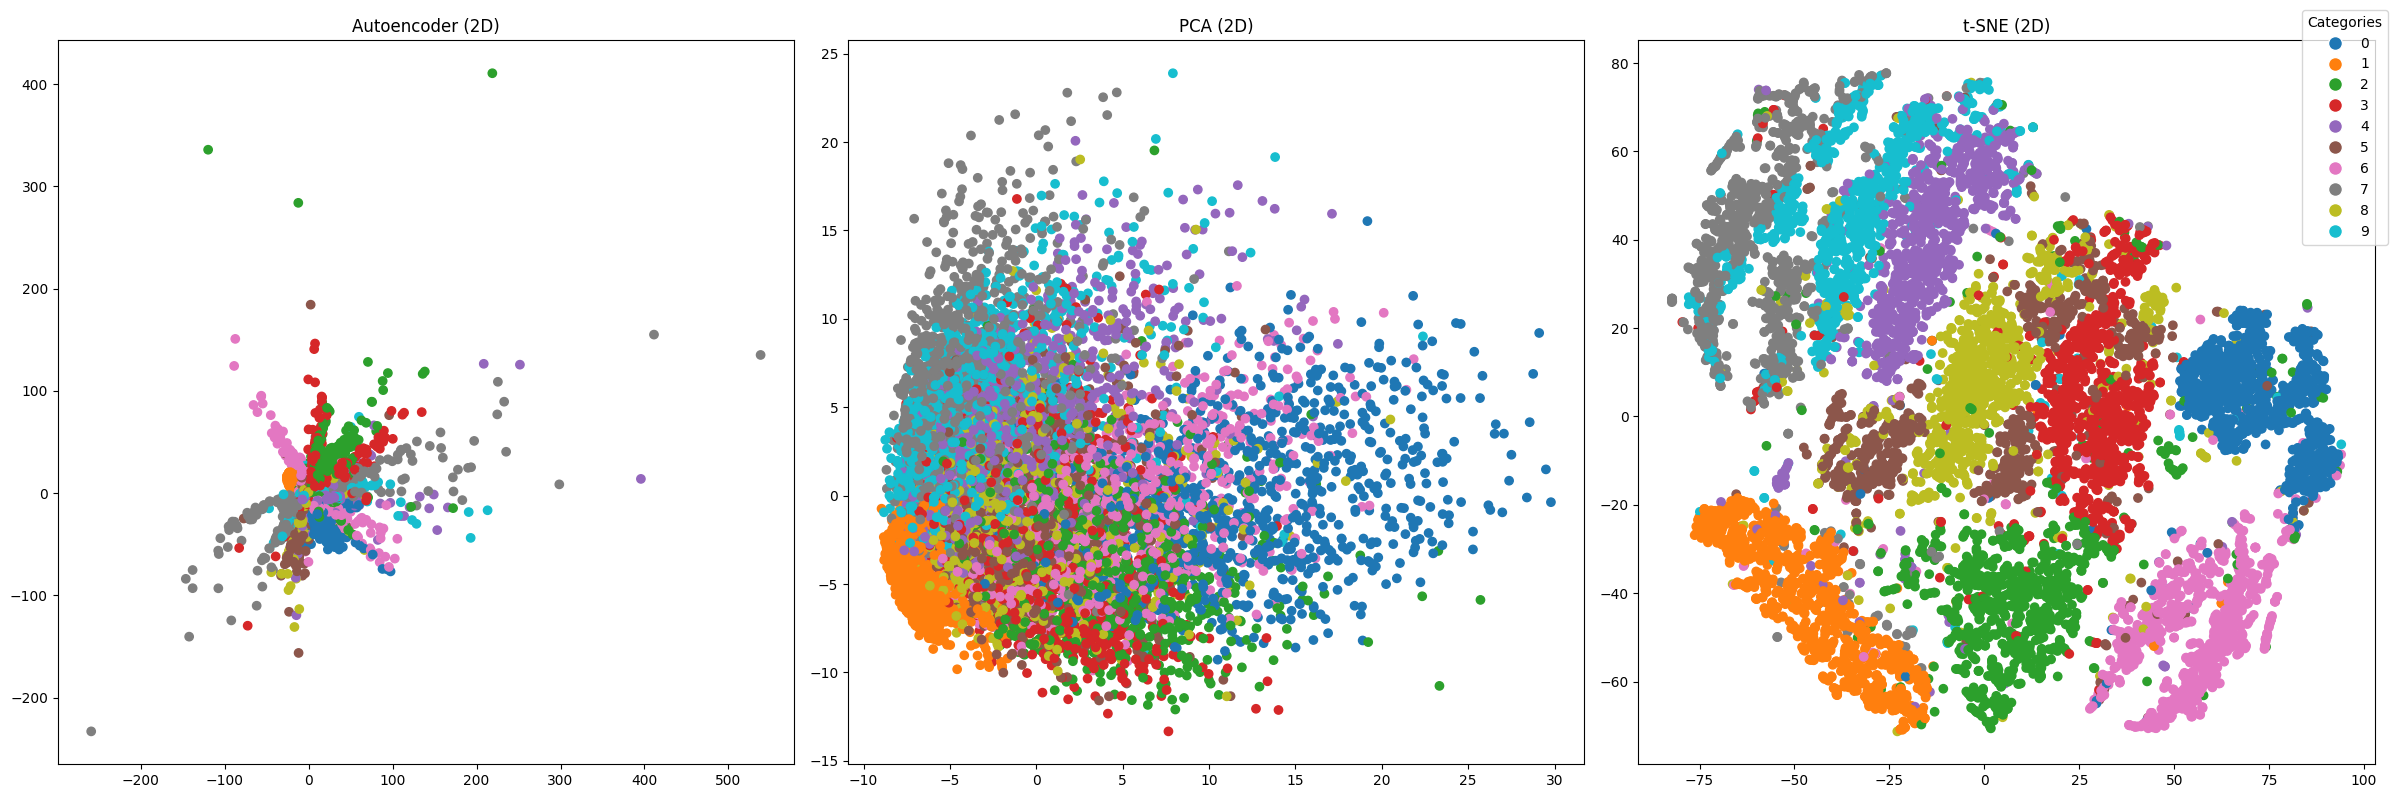

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

scatter1 = plotResults(X_ae, y_sample.cat.codes, 'Autoencoder (2D)', axs[0])
scatter2 = plotResults(X_pca, y_sample.cat.codes, 'PCA (2D)', axs[1])
scatter3 = plotResults(X_tsne, y_sample.cat.codes, 't-SNE (2D)', axs[2])

labels = np.unique(y_sample.cat.codes)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=plt.cm.tab10(i), markersize=10) for i, label in enumerate(labels)]
fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1, 1), title='Categories')
plt.tight_layout()
plt.show()

Llegamos a la conclusión que el autoencoder toma datos de forma más centrada que los otros dos, este esta distribuido mejor que los otros. 
Por otro lado, t-SNE no divide muy ordenadamente, pero crea chunks muy claros. 
PCA es el peor, porque hay algunos encima de otros, y una división de chunks muy desordenada. 

Sería mejor usar encoder o t-SNE para mejores resultados. 